In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import pandas as pd
from src.results.statistical_analysis import calculate_spearman_correlations
import warnings
warnings.filterwarnings('ignore')

In [38]:
df_complexity = pd.read_parquet('data/results/complexity_data.parquet')
df_performance = pd.read_parquet('data/results/performance_data.parquet')

In [39]:
df_complexity

,dataset,k,metric,method,dataset_complexity,majority_class_complexity,minority_class_complexity,most_complex_value,least_complex_value
0,a9a,1,mean_folds,kdn,0.190819,0.130744,0.380213,0.380213,0.130744
1,a9a,1,mean_folds,ddn,0.213374,0.146188,0.425189,0.425189,0.146188
2,a9a,1,global,kdn,0.188784,0.129490,0.375717,0.375717,0.129490
3,a9a,1,global,ddn,0.212416,0.145419,0.423633,0.423633,0.145419
4,a9a,2,mean_folds,kdn,0.201003,0.138729,0.397335,0.397335,0.138729
...,...,...,...,...,...,...,...,...,...
1623,w8a,10,global,ddn,0.027013,0.018988,0.288925,0.288925,0.018988
1624,w8a,11,mean_folds,kdn,0.041126,0.034041,0.272339,0.272339,0.034041
1625,w8a,11,mean_folds,ddn,0.026537,0.018873,0.276656,0.276656,0.018873
1626,w8a,11,global,kdn,0.026844,0.018257,0.307087,0.307087,0.018257


In [40]:
# Llamada a la función con los DataFrames correspondientes
correlation_results = calculate_spearman_correlations(df_performance, df_complexity)

In [41]:
correlation_results['f1_score']

,method,k,complexity_metric,performance_metric,corr_dataset_complexity,corr_majority_class_complexity,corr_minority_class_complexity,corr_most_complex_value,corr_least_complex_value
0,kdn,1,mean_folds,f1_score,0.109319,0.172052,0.662476,0.597818,0.224515
1,kdn,1,global,f1_score,0.113595,0.031778,0.695920,0.631292,0.088710
2,kdn,2,mean_folds,f1_score,0.105525,0.093668,0.699117,0.625800,0.144424
3,kdn,2,global,f1_score,0.098411,0.010197,0.744070,0.660185,0.057163
4,kdn,3,mean_folds,f1_score,0.098885,0.082286,0.715200,0.649277,0.137547
5,kdn,3,global,f1_score,0.108371,0.016362,0.767653,0.704766,0.066639
6,kdn,4,mean_folds,f1_score,0.090823,0.075646,0.732986,0.671093,0.128535
7,kdn,4,global,f1_score,0.111217,0.016125,0.753616,0.696704,0.061896
8,kdn,5,mean_folds,f1_score,0.092009,0.050510,0.733697,0.676310,0.096277
9,kdn,5,global,f1_score,0.102680,0.003557,0.769504,0.712118,0.048141


In [42]:
correlation_results['gps_score']

,method,k,complexity_metric,performance_metric,corr_dataset_complexity,corr_majority_class_complexity,corr_minority_class_complexity,corr_most_complex_value,corr_least_complex_value
0,kdn,1,mean_folds,gps_score,0.153153,0.209709,0.655442,0.592698,0.261220
1,kdn,1,global,gps_score,0.157667,0.075396,0.688404,0.625452,0.132322
2,kdn,2,mean_folds,gps_score,0.150545,0.137743,0.693379,0.621385,0.190504
3,kdn,2,global,gps_score,0.146515,0.057373,0.737491,0.657183,0.105051
4,kdn,3,mean_folds,gps_score,0.141299,0.124941,0.705548,0.639877,0.183866
5,kdn,3,global,gps_score,0.154576,0.062826,0.756209,0.693220,0.115109
6,kdn,4,mean_folds,gps_score,0.135135,0.120910,0.722854,0.661214,0.176279
7,kdn,4,global,gps_score,0.159080,0.063537,0.747748,0.690612,0.111789
8,kdn,5,mean_folds,gps_score,0.137980,0.100284,0.720958,0.663585,0.148412
9,kdn,5,global,gps_score,0.153627,0.055002,0.763395,0.706022,0.102306


In [43]:
correlation_results['scaled_mcc_score']

,method,k,complexity_metric,performance_metric,corr_dataset_complexity,corr_majority_class_complexity,corr_minority_class_complexity,corr_most_complex_value,corr_least_complex_value
0,kdn,1,mean_folds,scaled_mcc_score,0.266066,0.302010,0.695446,0.635286,0.358299
1,kdn,1,global,scaled_mcc_score,0.272010,0.183791,0.726992,0.666864,0.244782
2,kdn,2,mean_folds,scaled_mcc_score,0.262746,0.239507,0.730183,0.660422,0.296200
3,kdn,2,global,scaled_mcc_score,0.260375,0.166943,0.765655,0.689353,0.218691
4,kdn,3,mean_folds,scaled_mcc_score,0.255632,0.229073,0.730140,0.664928,0.292642
5,kdn,3,global,scaled_mcc_score,0.271283,0.175717,0.777850,0.715200,0.231932
6,kdn,4,mean_folds,scaled_mcc_score,0.253261,0.230970,0.741048,0.679393,0.290508
7,kdn,4,global,scaled_mcc_score,0.276263,0.176903,0.765710,0.708798,0.229086
8,kdn,5,mean_folds,scaled_mcc_score,0.258003,0.211999,0.737254,0.679867,0.264169
9,kdn,5,global,scaled_mcc_score,0.271757,0.169078,0.776856,0.719469,0.220312


In [46]:
import pandas as pd

def summarize_correlations(df):
    # Group by method, complexity metric, and performance metric to calculate summary statistics
    summary = df.groupby(['method', 'complexity_metric']).agg(
        mean_corr_dataset=('corr_dataset_complexity', 'mean'),
        std_corr_dataset=('corr_dataset_complexity', 'std'),
        mean_corr_majority=('corr_majority_class_complexity', 'mean'),
        std_corr_majority=('corr_majority_class_complexity', 'std'),
        mean_corr_minority=('corr_minority_class_complexity', 'mean'),
        std_corr_minority=('corr_minority_class_complexity', 'std'),
        mean_corr_most_complex=('corr_most_complex_value', 'mean'),
        std_corr_most_complex=('corr_most_complex_value', 'std'),
        mean_corr_least_complex=('corr_least_complex_value', 'mean'),
        std_corr_least_complex=('corr_least_complex_value', 'std'),
    ).reset_index()

    return summary

# Generar el resumen de las correlaciones
correlation_summary = summarize_correlations(correlation_results['scaled_mcc_score'])  # Usando 'scaled_mcc_score' como ejemplo

# Mostrar los resultados
correlation_summary


,method,complexity_metric,mean_corr_dataset,std_corr_dataset,mean_corr_majority,std_corr_majority,mean_corr_minority,std_corr_minority,mean_corr_most_complex,std_corr_most_complex,mean_corr_least_complex,std_corr_least_complex
0,ddn,global,0.234378,0.041453,0.116736,0.060857,0.700278,0.040999,0.637230,0.038636,0.168523,0.062734
1,ddn,mean_folds,0.201953,0.056062,0.095469,0.064331,0.679560,0.036673,0.616854,0.034444,0.146394,0.070402
2,kdn,global,0.267598,0.005148,0.174770,0.006326,0.765725,0.015412,0.709060,0.019373,0.229024,0.009215
3,kdn,mean_folds,0.259211,0.004304,0.226067,0.027547,0.737294,0.016307,0.679436,0.020559,0.279220,0.030451


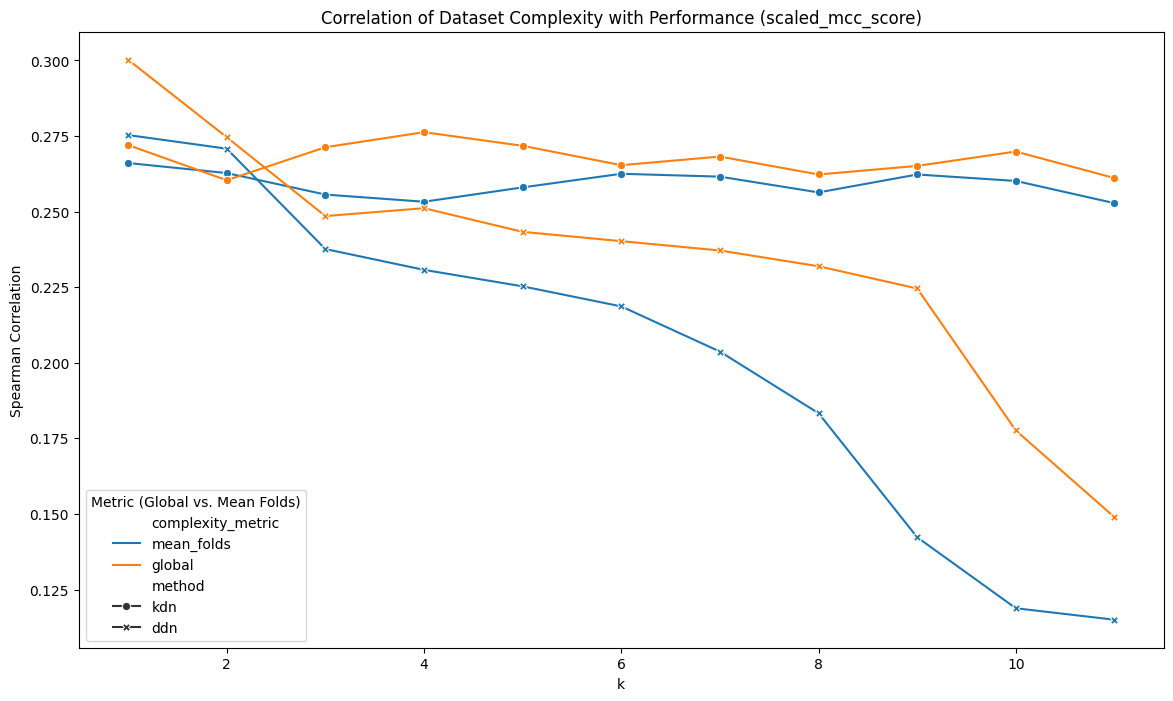

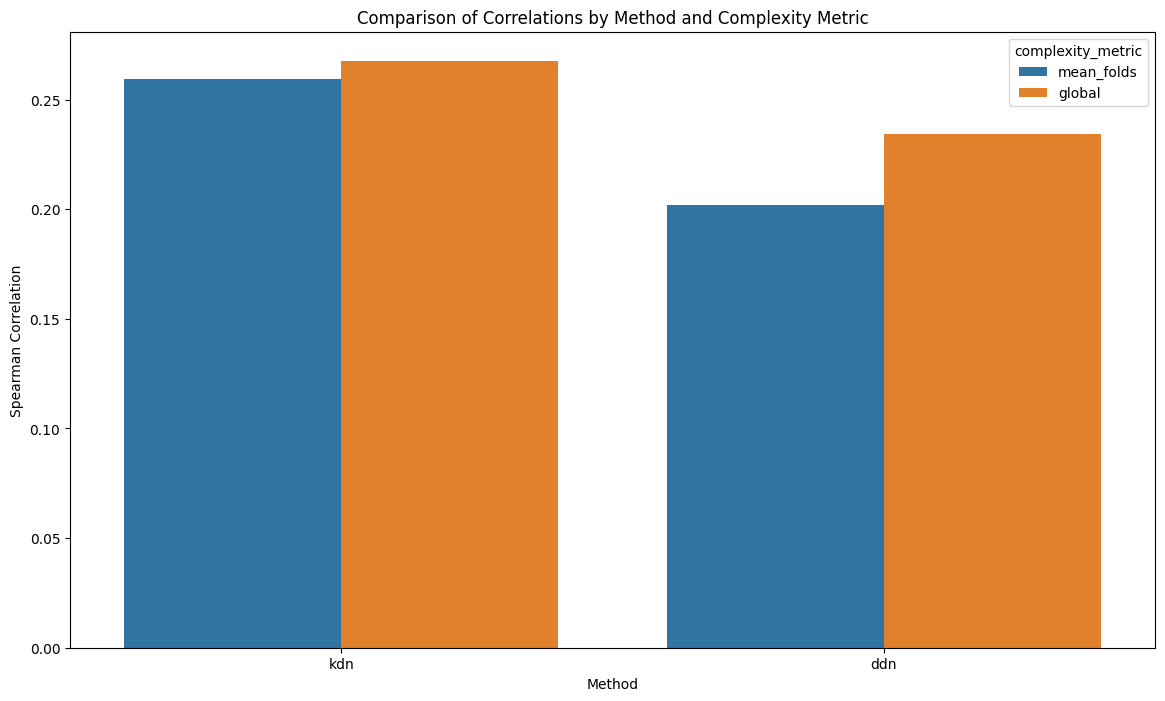

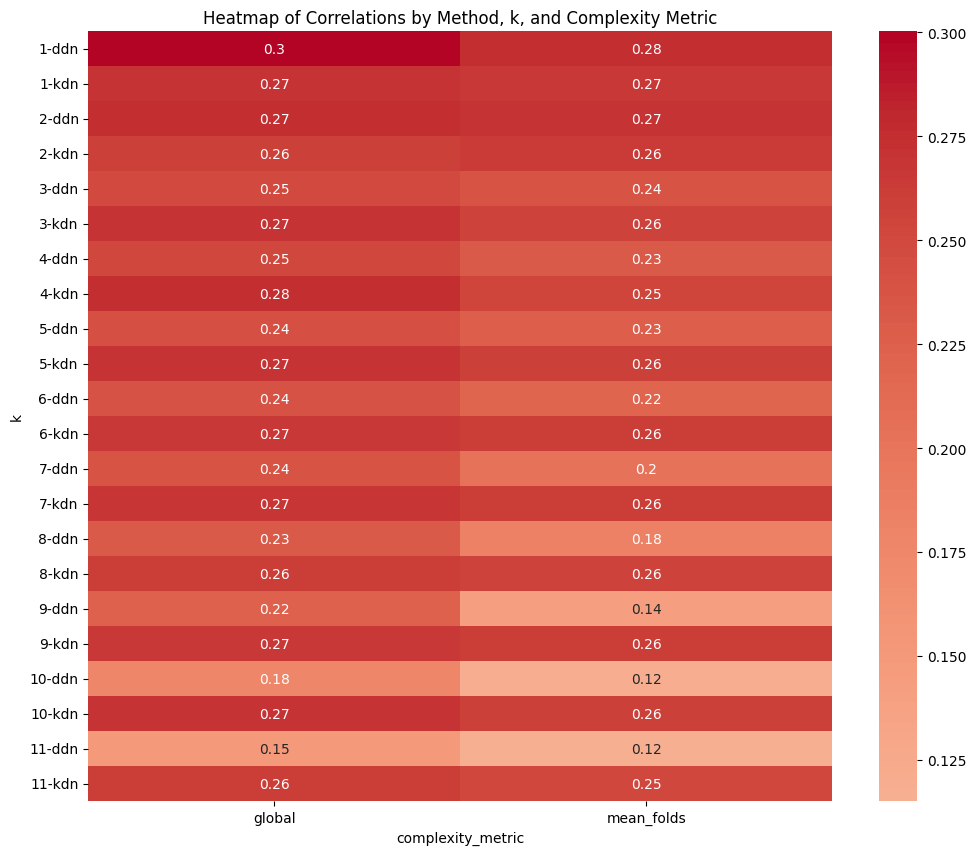

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlations(df):
    # Gráfico de Líneas: Comparación de Correlaciones por k, method y complexity_metric
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df, x='k', y='corr_dataset_complexity', hue='complexity_metric', style='method', markers=True, dashes=False)
    plt.title('Correlation of Dataset Complexity with Performance (scaled_mcc_score)')
    plt.ylabel('Spearman Correlation')
    plt.xlabel('k')
    plt.legend(title='Metric (Global vs. Mean Folds)')
    plt.show()

    # Gráfico de Barras: Comparación por method y complexity_metric
    plt.figure(figsize=(14, 8))
    sns.barplot(data=df, x='method', y='corr_dataset_complexity', hue='complexity_metric', ci=None)
    plt.title('Comparison of Correlations by Method and Complexity Metric')
    plt.ylabel('Spearman Correlation')
    plt.xlabel('Method')
    plt.show()

    # Gráfico de Calor: Heatmap para visualizar las correlaciones
    pivot_table = df.pivot_table(index=['k', 'method'], columns='complexity_metric', values='corr_dataset_complexity')
    plt.figure(figsize=(12, 10))
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', center=0)
    plt.title('Heatmap of Correlations by Method, k, and Complexity Metric')
    plt.ylabel('k')
    plt.show()

# Llamada a la función para generar gráficos
plot_correlations(correlation_results['scaled_mcc_score'])
